In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Ejercicio 6

Vamos a practicar el uso de GeoPandas para graficar información Geográfica. Para ello, vas a tener que hacer lo siguiente:

1. Investiga, en alguna fuente pública, algún dato numérico a nivel municipio en México. Por ejemplo, Nivel de Ingresos, Precio de la gasolina, Porcentaje Económicamente activa, etc. Algunas posibles fuentes son el [INEGI](https://www.inegi.org.mx/) o la página de [Datos Abiertos del Gobierno de México](https://datos.gob.mx/)

2. Utiliza el Marco Geoestadístico del Inegi, al igual que en el ejercicio de clase, para crear tu GeoDataFrame. Usa un Join de forma exitosa para juntarlo con tu tabla que obtuviste en el punto 1.

3. Crea un Cloropeth Graph con tus datos. Juega con el parámetro `cmap` para modificar los colores a usar.

4. Filtra tu GeoDataFrame para quedarte sólo con los datos de tu Estado de Origen. Realiza nuevamente un Cloropeth Graph, pero ahora sólo con esos datos.

¡Mucho éxito!

In [3]:
mx = gpd.read_file('mapa_mexico')\
        .set_index('CLAVE')\
        .to_crs(epsg=4485) # Qué proyección utilizar al graficar.
mx.head()

NOM_MUN           NOMEDO CVE_EDO CVE_MUNI          Area  \
CLAVE                                                                          
02004                Tijuana  Baja California      02      004   1122.661145   
02003                 Tecate  Baja California      02      003   3670.991923   
02002               Mexicali  Baja California      02      002  13119.275713   
02005     Playas de Rosarito  Baja California      02      005    517.120801   
26055  San Luis Rio Colorado           Sonora      26      055   9033.770278   

                                                geometry  
CLAVE                                                     
02004  POLYGON ((-73565.018 3602427.487, -73564.403 3...  
02003  POLYGON ((-38995.078 3617846.589, -31557.921 3...  
02002  POLYGON ((48160.716 3621731.593, 58570.990 362...  
02005  POLYGON ((-70946.724 3594803.753, -70966.034 3...  
26055  POLYGON ((127160.493 3587762.823, 127099.688 3...

## Preparando los datos

In [4]:
claves = ['']*len(mx['CVE_EDO'])
claves_pd = pd.DataFrame(claves)
claves_pd.columns = ['CVE_ENT']
mx2 = mx.join(claves_pd)
for i in range(0, len(mx['CVE_EDO'])):
  mx2['CVE_ENT'][i] = (str(mx2['CVE_EDO'][i]).split(' ')[0]+str(mx2['CVE_MUNI'][i]).split(' ')[0])
mx2

<ipython-input-4-8c0a71fb377a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mx2['CVE_ENT'][i] = (str(mx2['CVE_EDO'][i]).split(' ')[0]+str(mx2['CVE_MUNI'][i]).split(' ')[0])


NOM_MUN          NOMEDO CVE_EDO CVE_MUNI         Area  \
01001         Aguascalientes  Aguascalientes      01      001  1168.762384   
01002               Asientos  Aguascalientes      01      002   547.762077   
01003               Calvillo  Aguascalientes      01      003   931.300088   
01004                  Cosio  Aguascalientes      01      004   128.907513   
01005            Jesus Maria  Aguascalientes      01      005   499.207990   
...                      ...             ...     ...      ...          ...   
32053  Villa Gonzalez Ortega       Zacatecas      32      053   417.529939   
32054          Villa Hidalgo       Zacatecas      32      054   355.528477   
32055             Villanueva       Zacatecas      32      055  2158.696446   
32056              Zacatecas       Zacatecas      32      056   444.547742   
32057               Trancoso       Zacatecas      32      057   215.239163   

                                                geometry CVE_ENT  
01001  POLYGON ((1416489.577 2467700.472, 1417908.226...   01001  
01002  POLYGON ((1417043.958 2491681.240, 1417408.488...   01002  
01003  POLYGON ((1347882.273 2454901.097, 1348002.307...   01003  
01004  POLYGON ((1397788.297 2509816.078, 1398009.089...   01004  
01005  POLYGON ((1388272.165 2462097.533, 1389832.232...   01005  
...                                                  ...     ...  
32053  POLYGON ((1432967.088 2533295.874, 1432739.332...   32053  
32054  POLYGON ((1464010.774 2518715.060, 1464186.335...   32054  
32055  POLYGON ((1345756.044 2531084.706, 1346503.579...   32055  
32056  POLYGON ((1339206.596 2548649.944, 1340025.280...   32056  
32057  POLYGON ((1400816.550 2541592.398, 1400764.458...   32057  

[2480 rows x 7 columns]

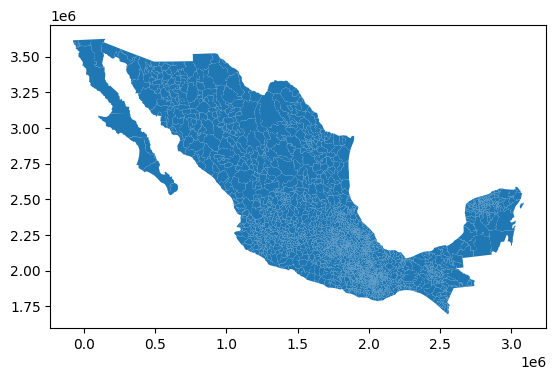

In [5]:
mx2.plot()
plt.show()

In [6]:
mx.index = mx.index.astype("int")
mx.head()

NOM_MUN           NOMEDO CVE_EDO CVE_MUNI          Area  \
CLAVE                                                                          
2004                 Tijuana  Baja California      02      004   1122.661145   
2003                  Tecate  Baja California      02      003   3670.991923   
2002                Mexicali  Baja California      02      002  13119.275713   
2005      Playas de Rosarito  Baja California      02      005    517.120801   
26055  San Luis Rio Colorado           Sonora      26      055   9033.770278   

                                                geometry  
CLAVE                                                     
2004   POLYGON ((-73565.018 3602427.487, -73564.403 3...  
2003   POLYGON ((-38995.078 3617846.589, -31557.921 3...  
2002   POLYGON ((48160.716 3621731.593, 58570.990 362...  
2005   POLYGON ((-70946.724 3594803.753, -70966.034 3...  
26055  POLYGON ((127160.493 3587762.823, 127099.688 3...

In [7]:
base = pd.read_excel("modelo_estadistico_caracteristicas_laborales_municipal_2021.xlsx")
base.dropna(inplace = True)
base

Entidad federativa                  Municipio  \
0            00 Nacional                      Total   
1            00 Nacional                      Total   
2            00 Nacional                      Total   
3            00 Nacional                      Total   
4            00 Nacional                      Total   
...                  ...                        ...   
12475       32 Zacatecas  058 Santa María de la Paz   
12476       32 Zacatecas  058 Santa María de la Paz   
12477       32 Zacatecas  058 Santa María de la Paz   
12478       32 Zacatecas  058 Santa María de la Paz   
12479       32 Zacatecas  058 Santa María de la Paz   

                          Estimador  Población económicamente activa1  \
0                             Valor                         57.132903   
1                    Error estándar                          0.198525   
2      Límite inferior de confianza                         56.806342   
3      Límite superior de confianza                         57.459465   
4      Coeficiente de variación (%)                          0.347479   
...                             ...                               ...   
12475                         Valor                         50.736853   
12476                Error estándar                          1.050818   
12477  Límite inferior de confianza                         49.008412   
12478  Límite superior de confianza                         52.465295   
12479  Coeficiente de variación (%)                          2.071113   

       Población ocupada2  Población ocupada informal3  
0               95.645288                    55.066176  
1                0.104089                     0.342749  
2               95.474067                    54.502375  
3               95.816509                    55.629976  
4                0.108829                     0.622430  
...                   ...                          ...  
12475           98.842469                    93.314156  
12476            1.783047                     3.072695  
12477           95.909618                    88.260023  
12478           99.290969                    98.368289  
12479            1.803928                     3.292849  

[12480 rows x 6 columns]

In [8]:
base2 = base[base['Estimador'] == 'Valor']
base2.reset_index(drop=True, inplace = True)
base2

Entidad federativa                  Municipio Estimador  \
0           00 Nacional                      Total     Valor   
1     01 Aguascalientes                      Total     Valor   
2     01 Aguascalientes         001 Aguascalientes     Valor   
3     01 Aguascalientes               002 Asientos     Valor   
4     01 Aguascalientes               003 Calvillo     Valor   
...                 ...                        ...       ...   
2491       32 Zacatecas          054 Villa Hidalgo     Valor   
2492       32 Zacatecas             055 Villanueva     Valor   
2493       32 Zacatecas              056 Zacatecas     Valor   
2494       32 Zacatecas               057 Trancoso     Valor   
2495       32 Zacatecas  058 Santa María de la Paz     Valor   

      Población económicamente activa1  Población ocupada2  \
0                            57.132903           95.645288   
1                            57.822495           96.377584   
2                            58.150351           96.258445   
3                            54.412183           97.022047   
4                            55.190087           97.266720   
...                                ...                 ...   
2491                         53.146856           97.501957   
2492                         55.180928           97.126714   
2493                         60.293287           94.761768   
2494                         56.703254           97.109746   
2495                         50.736853           98.842469   

      Población ocupada informal3  
0                       55.066176  
1                       38.689561  
2                       34.363391  
3                       62.545486  
4                       53.501672  
...                           ...  
2491                    80.660394  
2492                    69.898408  
2493                    39.680290  
2494                    78.421138  
2495                    93.314156  

[2496 rows x 6 columns]

In [9]:
base3 = base2[base2['Municipio'] != 'Total']
base3.reset_index(drop = True, inplace = True)
base3

Entidad federativa                  Municipio Estimador  \
0     01 Aguascalientes         001 Aguascalientes     Valor   
1     01 Aguascalientes               002 Asientos     Valor   
2     01 Aguascalientes               003 Calvillo     Valor   
3     01 Aguascalientes                  004 Cosío     Valor   
4     01 Aguascalientes            005 Jesús María     Valor   
...                 ...                        ...       ...   
2458       32 Zacatecas          054 Villa Hidalgo     Valor   
2459       32 Zacatecas             055 Villanueva     Valor   
2460       32 Zacatecas              056 Zacatecas     Valor   
2461       32 Zacatecas               057 Trancoso     Valor   
2462       32 Zacatecas  058 Santa María de la Paz     Valor   

      Población económicamente activa1  Población ocupada2  \
0                            58.150351           96.258445   
1                            54.412183           97.022047   
2                            55.190087           97.266720   
3                            54.612445           98.368497   
4                            58.869347           96.167861   
...                                ...                 ...   
2458                         53.146856           97.501957   
2459                         55.180928           97.126714   
2460                         60.293287           94.761768   
2461                         56.703254           97.109746   
2462                         50.736853           98.842469   

      Población ocupada informal3  
0                       34.363391  
1                       62.545486  
2                       53.501672  
3                       48.223621  
4                       42.535281  
...                           ...  
2458                    80.660394  
2459                    69.898408  
2460                    39.680290  
2461                    78.421138  
2462                    93.314156  

[2463 rows x 6 columns]

In [10]:
id = []
for i in range(0, len(base3['Entidad federativa'])):
  id.append(base3['Entidad federativa'][i].split(' ')[0]+base3['Municipio'][i].split(' ')[0])
id_pd = pd.DataFrame(id)
id_pd.columns = ['CVE_ENT']
base4 = base3.join(id_pd)
base4

Entidad federativa                  Municipio Estimador  \
0     01 Aguascalientes         001 Aguascalientes     Valor   
1     01 Aguascalientes               002 Asientos     Valor   
2     01 Aguascalientes               003 Calvillo     Valor   
3     01 Aguascalientes                  004 Cosío     Valor   
4     01 Aguascalientes            005 Jesús María     Valor   
...                 ...                        ...       ...   
2458       32 Zacatecas          054 Villa Hidalgo     Valor   
2459       32 Zacatecas             055 Villanueva     Valor   
2460       32 Zacatecas              056 Zacatecas     Valor   
2461       32 Zacatecas               057 Trancoso     Valor   
2462       32 Zacatecas  058 Santa María de la Paz     Valor   

      Población económicamente activa1  Población ocupada2  \
0                            58.150351           96.258445   
1                            54.412183           97.022047   
2                            55.190087           97.266720   
3                            54.612445           98.368497   
4                            58.869347           96.167861   
...                                ...                 ...   
2458                         53.146856           97.501957   
2459                         55.180928           97.126714   
2460                         60.293287           94.761768   
2461                         56.703254           97.109746   
2462                         50.736853           98.842469   

      Población ocupada informal3 CVE_ENT  
0                       34.363391   01001  
1                       62.545486   01002  
2                       53.501672   01003  
3                       48.223621   01004  
4                       42.535281   01005  
...                           ...     ...  
2458                    80.660394   32054  
2459                    69.898408   32055  
2460                    39.680290   32056  
2461                    78.421138   32057  
2462                    93.314156   32058  

[2463 rows x 7 columns]

In [11]:
basefinal = base4[['Población económicamente activa1','CVE_ENT']]
basefinal

Población económicamente activa1 CVE_ENT
0                            58.150351   01001
1                            54.412183   01002
2                            55.190087   01003
3                            54.612445   01004
4                            58.869347   01005
...                                ...     ...
2458                         53.146856   32054
2459                         55.180928   32055
2460                         60.293287   32056
2461                         56.703254   32057
2462                         50.736853   32058

[2463 rows x 2 columns]

In [12]:
mx_econ = mx2.merge(basefinal, left_index=True, right_on="CVE_ENT")
mx_econ

CVE_ENT                NOM_MUN          NOMEDO CVE_EDO CVE_MUNI  \
0      01001         Aguascalientes  Aguascalientes      01      001   
1      01002               Asientos  Aguascalientes      01      002   
2      01003               Calvillo  Aguascalientes      01      003   
3      01004                  Cosio  Aguascalientes      01      004   
4      01005            Jesus Maria  Aguascalientes      01      005   
...      ...                    ...             ...     ...      ...   
2457   32053  Villa Gonzalez Ortega       Zacatecas      32      053   
2458   32054          Villa Hidalgo       Zacatecas      32      054   
2459   32055             Villanueva       Zacatecas      32      055   
2460   32056              Zacatecas       Zacatecas      32      056   
2461   32057               Trancoso       Zacatecas      32      057   

             Area                                           geometry  \
0     1168.762384  POLYGON ((1416489.577 2467700.472, 1417908.226...   
1      547.762077  POLYGON ((1417043.958 2491681.240, 1417408.488...   
2      931.300088  POLYGON ((1347882.273 2454901.097, 1348002.307...   
3      128.907513  POLYGON ((1397788.297 2509816.078, 1398009.089...   
4      499.207990  POLYGON ((1388272.165 2462097.533, 1389832.232...   
...           ...                                                ...   
2457   417.529939  POLYGON ((1432967.088 2533295.874, 1432739.332...   
2458   355.528477  POLYGON ((1464010.774 2518715.060, 1464186.335...   
2459  2158.696446  POLYGON ((1345756.044 2531084.706, 1346503.579...   
2460   444.547742  POLYGON ((1339206.596 2548649.944, 1340025.280...   
2461   215.239163  POLYGON ((1400816.550 2541592.398, 1400764.458...   

     CVE_ENT_x  Población económicamente activa1 CVE_ENT_y  
0        01001                         58.150351     01001  
1        01002                         54.412183     01002  
2        01003                         55.190087     01003  
3        01004                         54.612445     01004  
4        01005                         58.869347     01005  
...        ...                               ...       ...  
2457     32053                         51.451078     32053  
2458     32054                         53.146856     32054  
2459     32055                         55.180928     32055  
2460     32056                         60.293287     32056  
2461     32057                         56.703254     32057  

[2480 rows x 10 columns]

In [13]:
mx_econ_final = mx_econ.drop(labels = ['CVE_ENT_x', 'CVE_ENT_y'], axis = 1)
mx_econ_final

CVE_ENT                NOM_MUN          NOMEDO CVE_EDO CVE_MUNI  \
0      01001         Aguascalientes  Aguascalientes      01      001   
1      01002               Asientos  Aguascalientes      01      002   
2      01003               Calvillo  Aguascalientes      01      003   
3      01004                  Cosio  Aguascalientes      01      004   
4      01005            Jesus Maria  Aguascalientes      01      005   
...      ...                    ...             ...     ...      ...   
2457   32053  Villa Gonzalez Ortega       Zacatecas      32      053   
2458   32054          Villa Hidalgo       Zacatecas      32      054   
2459   32055             Villanueva       Zacatecas      32      055   
2460   32056              Zacatecas       Zacatecas      32      056   
2461   32057               Trancoso       Zacatecas      32      057   

             Area                                           geometry  \
0     1168.762384  POLYGON ((1416489.577 2467700.472, 1417908.226...   
1      547.762077  POLYGON ((1417043.958 2491681.240, 1417408.488...   
2      931.300088  POLYGON ((1347882.273 2454901.097, 1348002.307...   
3      128.907513  POLYGON ((1397788.297 2509816.078, 1398009.089...   
4      499.207990  POLYGON ((1388272.165 2462097.533, 1389832.232...   
...           ...                                                ...   
2457   417.529939  POLYGON ((1432967.088 2533295.874, 1432739.332...   
2458   355.528477  POLYGON ((1464010.774 2518715.060, 1464186.335...   
2459  2158.696446  POLYGON ((1345756.044 2531084.706, 1346503.579...   
2460   444.547742  POLYGON ((1339206.596 2548649.944, 1340025.280...   
2461   215.239163  POLYGON ((1400816.550 2541592.398, 1400764.458...   

      Población económicamente activa1  
0                            58.150351  
1                            54.412183  
2                            55.190087  
3                            54.612445  
4                            58.869347  
...                                ...  
2457                         51.451078  
2458                         53.146856  
2459                         55.180928  
2460                         60.293287  
2461                         56.703254  

[2480 rows x 8 columns]

## Cloropeth Graph País

In [14]:
fig, ax = plt.subplots()

mx_econ_final.plot(column="Población económicamente activa1", ax=ax, legend=True, cmap = 'cividis')
fig.set_size_inches(12, 8)
ax.set_axis_off()
plt.title("% de Poblacion económicamente activa")
plt.annotate('Fuente: INEGI, https://www.inegi.org.mx/investigacion/ilmm/2021/#Tabulados', xy=(0.15, 0.13),  xycoords='figure fraction')
plt.show()

## Cloropeth Graph Puebla

In [15]:
puebla_econ_final = mx_econ_final[mx_econ_final['NOMEDO'] == 'Puebla']
puebla_econ_final.reset_index(drop = True, inplace = True)
puebla_econ_final

CVE_ENT      NOM_MUN  NOMEDO CVE_EDO CVE_MUNI        Area  \
0     21001      Acajete  Puebla      21      001  147.867725   
1     21002      Acateno  Puebla      21      002  181.238013   
2     21003      Acatlan  Puebla      21      003  459.643032   
3     21003      Acatlan  Puebla      21      003  165.731439   
4     21004    Acatzingo  Puebla      21      004  144.360847   
..      ...          ...     ...     ...      ...         ...   
220   21214  Zinacatepec  Puebla      21      214   62.683798   
221   21215   Zongozotla  Puebla      21      215   35.463354   
222   21216    Zoquiapan  Puebla      21      216    5.365475   
223   21216    Zoquiapan  Puebla      21      216   15.137707   
224   21217    Zoquitlan  Puebla      21      217  253.389036   

                                              geometry  \
0    POLYGON ((1885391.104 2172451.057, 1885600.630...   
1    POLYGON ((1958344.051 2290749.463, 1958271.544...   
2    POLYGON ((1888050.289 2076815.721, 1888729.446...   
3    POLYGON ((1869605.811 2034458.112, 1869576.131...   
4    POLYGON ((1897868.533 2167073.678, 1898140.284...   
..                                                 ...   
220  POLYGON ((1973814.703 2084085.800, 1973273.535...   
221  POLYGON ((1899859.352 2267437.540, 1899837.921...   
222  POLYGON ((1925269.118 2281649.239, 1925212.605...   
223  POLYGON ((1912255.440 2272670.709, 1912241.135...   
224  POLYGON ((1998181.168 2099766.854, 1998235.933...   

     Población económicamente activa1  
0                           58.902584  
1                           56.839574  
2                           54.436740  
3                           54.436740  
4                           61.936284  
..                                ...  
220                         58.978237  
221                         57.485468  
222                         51.720899  
223                         51.720899  
224                         54.666122  

[225 rows x 8 columns]

In [16]:
fig, ax = plt.subplots()

puebla_econ_final.plot(column="Población económicamente activa1", ax=ax, legend=True, cmap = 'cividis')
fig.set_size_inches(12, 8)
ax.set_axis_off()
plt.title("% de Poblacion económicamente activa en Puebla")
plt.annotate('Fuente: INEGI, https://www.inegi.org.mx/investigacion/ilmm/2021/#Tabulados', xy=(0.15, 0.13),  xycoords='figure fraction')
plt.show()